**From uper Menu choose:**
---
Runtime --> Change runtime type:
---
change Hardare accelerator to (gpu)

In [2]:
%tensorflow_version 1.15
import tensorflow as tf
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


In [3]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
print(train_images.shape[1:])

(28, 28)


#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

In [5]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


#convert data to float and scale values between 0 and 1

In [0]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')
train_data1 = train_data.astype('float')
test_data1 = test_data.astype('float')

#scale data

In [0]:
train_data /=255.0
test_data /=255.0

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()

In [0]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network

In [9]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model

In [10]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 10s 161us/step - loss: 0.2689 - acc: 0.9189 - val_loss: 0.1608 - val_acc: 0.9487
Epoch 2/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0912 - acc: 0.9715 - val_loss: 0.0860 - val_acc: 0.9720
Epoch 3/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0574 - acc: 0.9819 - val_loss: 0.0718 - val_acc: 0.9775
Epoch 4/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0400 - acc: 0.9872 - val_loss: 0.0745 - val_acc: 0.9758
Epoch 5/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0276 - acc: 0.9911 - val_loss: 0.0937 - val_acc: 0.9741
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0224 - acc: 0.9928 - val_loss: 0.1140 - val_acc: 0.9690
Epoch 7/10
60000/60000 [

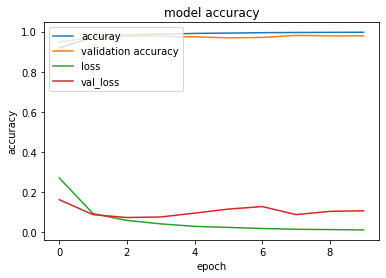

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

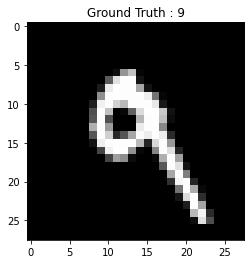

In [16]:
plt.imshow(test_images[7,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(test_labels[7]))
plt.show()

In [17]:

x=model.predict_classes(test_data[[7],:])
print("Predicted label",test_labels[x])

Predicted label [9]


In [18]:
m = Sequential()
m.add(Dense(512, activation='relu', input_shape=(dimData,)))
m.add(Dense(512, activation='relu'))
m.add(Dense(512, activation='tanh'))
m.add(Dense(512, activation='sigmoid'))
m.add(Dense(10, activation='softmax'))
m.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
m.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 23us/step - loss: 0.3290 - acc: 0.8955 - val_loss: 0.1458 - val_acc: 0.9540
Epoch 2/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.1055 - acc: 0.9681 - val_loss: 0.0798 - val_acc: 0.9759
Epoch 3/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0667 - acc: 0.9795 - val_loss: 0.0978 - val_acc: 0.9710
Epoch 4/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0470 - acc: 0.9852 - val_loss: 0.0965 - val_acc: 0.9739
Epoch 5/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0371 - acc: 0.9884 - val_loss: 0.0966 - val_acc: 0.9750
Epoch 6/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0305 - acc: 0.9910 - val_loss: 0.0987 - val_acc: 0.9751
Epoch 7/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0245 - acc: 0.9924 - val_loss: 0.0899 - val_acc

In [20]:
p = Sequential()
p.add(Dense(512, activation='relu', input_shape=(dimData,)))
p.add(Dense(512, activation='relu'))
p.add(Dense(10, activation='softmax'))
p.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
p.fit(train_data1, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data1, test_labels_one_hot)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 22us/step - loss: 9.2778 - acc: 0.4232 - val_loss: 8.3651 - val_acc: 0.4807
Epoch 2/10
60000/60000 [==============================] - 1s 18us/step - loss: 8.4470 - acc: 0.4755 - val_loss: 8.3920 - val_acc: 0.4792
Epoch 3/10
60000/60000 [==============================] - 1s 19us/step - loss: 8.3863 - acc: 0.4794 - val_loss: 8.2239 - val_acc: 0.4895
Epoch 4/10
60000/60000 [==============================] - 1s 18us/step - loss: 8.3247 - acc: 0.4834 - val_loss: 8.2894 - val_acc: 0.4854
Epoch 5/10
60000/60000 [==============================] - 1s 18us/step - loss: 8.2883 - acc: 0.4856 - val_loss: 8.3076 - val_acc: 0.4843
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 8.2898 - acc: 0.4855 - val_loss: 8.1429 - val_acc: 0.4948
Epoch 7/10
60000/60000 [==============================] - 1s 18us/step - loss: 8.1994 - acc: 0.4911 - val_loss: 8.2723 - val_acc

In [21]:
from keras.models import Model
from keras.layers import Input
i=Input(shape=(784,))
x= Dense(512, activation='relu')(i)
x= Dense(512, activation='relu')(x)

x= Dense(10, activation='softmax')(x)
p = Model(input=i,output=x)
p.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
p.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.2714 - acc: 0.9151 - val_loss: 0.1679 - val_acc: 0.9466
Epoch 2/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0923 - acc: 0.9712 - val_loss: 0.0993 - val_acc: 0.9693
Epoch 3/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0571 - acc: 0.9820 - val_loss: 0.0951 - val_acc: 0.9711
Epoch 4/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0411 - acc: 0.9869 - val_loss: 0.0710 - val_acc: 0.9789
Epoch 5/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0281 - acc: 0.9906 - val_loss: 0.0752 - val_acc: 0.9803
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0212 - acc: 0.9928 - val_loss: 0.0690 - val_acc: 0.9814
Epoch 7/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0176 - acc: 0.9940 - val_loss: 0.1262 - val_acc